In [1577]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import  SGDRegressor,LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

In [1578]:
df=pd.read_csv("train.csv")

In [1579]:
df.tail()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759
910,1049,2024-05-10,350,6,23.708015,51.351286,4,0,46.786860,intermediate,Vegetables,57.066481


In [1580]:
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


In [1581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


## Check Null values

In [1582]:
df.isnull().sum()

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
dtype: int64

## Handle Null values

In [1583]:
st_ex=df['staff_experience'].mode()[0]

In [1584]:
df.staff_experience.fillna(st_ex,inplace=True)

In [1585]:
df.isnull().sum()

ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
food_waste_kg       0
dtype: int64

In [1586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  911 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


## Check Duplicates

In [1587]:
df.duplicated().sum()

np.int64(0)

## Change the data type

In [1588]:
df.dtypes

ID                    int64
date                 object
meals_served          int64
kitchen_staff         int64
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event         int64
past_waste_kg       float64
staff_experience     object
waste_category       object
food_waste_kg       float64
dtype: object

In [1589]:
# Select object data type only and change data type to categorical
cat_cols=df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].astype('category')

In [1590]:
df.dtypes

ID                     int64
date                category
meals_served           int64
kitchen_staff          int64
temperature_C        float64
humidity_percent     float64
day_of_week            int64
special_event          int64
past_waste_kg        float64
staff_experience    category
waste_category      category
food_waste_kg        float64
dtype: object

## Drop unnecessary columns

In [1591]:
df.sample(3)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
168,197,2022-09-05,393,14,27.634640,80.503402,0,0,7.113785,Beginner,MEAT,43.231858
310,362,2024-04-02,296,7,20.879510,63.538838,1,0,20.014740,intermediate,dairy,29.024338
386,452,2023-06-12,321,9,25.159274,86.930757,0,1,49.796337,intermediate,MEAT,60.554783


In [1592]:
cols_to_drop = ['ID','date',]
df.drop(columns=cols_to_drop, inplace=True)

## Check outliers for numerical columns

In [1593]:
num_cols=df.select_dtypes(include=["number"])
num_cols.sample(2)

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
884,393,14,34.183904,49.515234,5,0,36.834182,50.279178
73,312,13,32.795901,43.213518,2,0,19.309215,27.260593


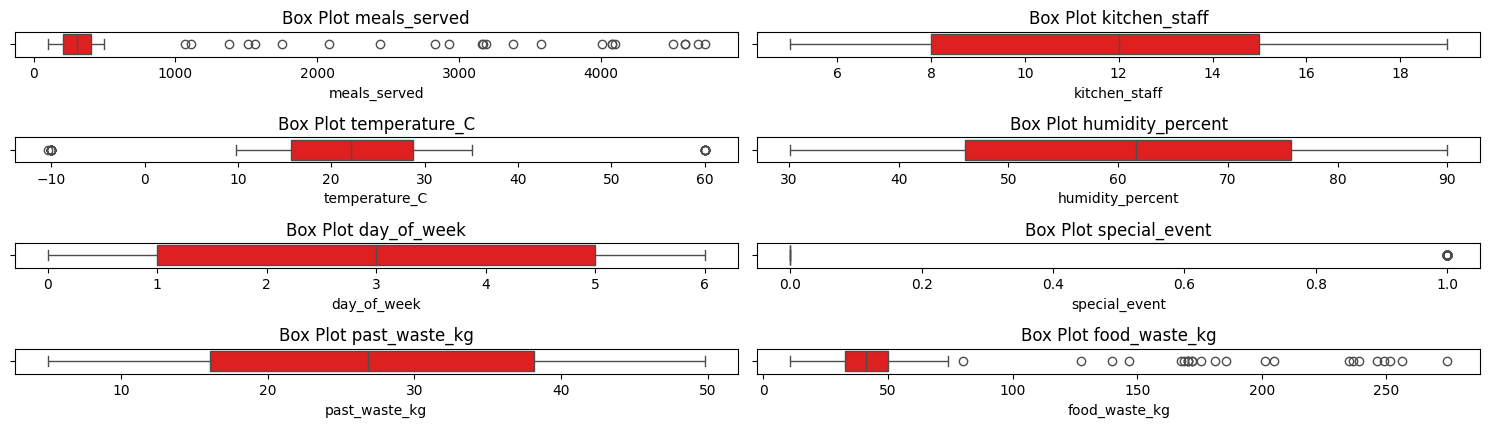

In [1594]:
plt.figure(figsize=(15,5))
for index,col in enumerate(num_cols.columns):
  plt.subplot(5,2,index+1)
  plt.title(f"Box Plot {col}")
  sns.boxplot(x=df[col],color="red")
plt.tight_layout()
plt.show()

## Replace outliers

In [1595]:
for col in num_cols:
  Q1= df[col].quantile(0.25)
  Q3= df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_fence=Q1-1.5*IQR
  upper_fence=Q3+1.5*IQR
  lower_outliers=df[df[col]<lower_fence][col].values
  upper_outliers=df[df[col]>upper_fence][col].values
  df[col].replace(lower_outliers,lower_fence,inplace=True)
  df[col].replace(upper_outliers,upper_fence,inplace=True)

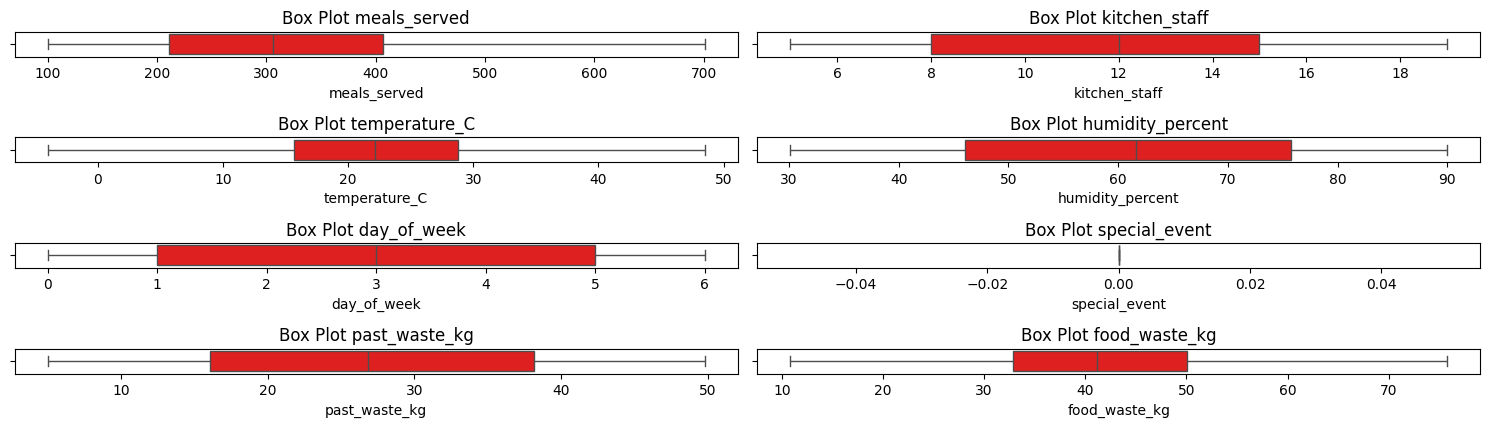

In [1596]:
plt.figure(figsize=(15,5))
for index,col in enumerate(num_cols.columns):
  plt.subplot(5,2,index+1)
  plt.title(f"Box Plot {col}")
  sns.boxplot(x=df[col],color="red")
plt.tight_layout()
plt.show()

## Label incoder

In [1597]:
df.sample(1)

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
135,268,7,26.226866,88.176464,6,0,19.175473,Beginner,MEAT,41.544223


In [1598]:
df["staff_experience"] = LabelEncoder().fit_transform(df["staff_experience"])
df["waste_category"] = LabelEncoder().fit_transform(df["waste_category"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   meals_served      911 non-null    int64  
 1   kitchen_staff     911 non-null    int64  
 2   temperature_C     911 non-null    float64
 3   humidity_percent  911 non-null    float64
 4   day_of_week       911 non-null    int64  
 5   special_event     911 non-null    int64  
 6   past_waste_kg     911 non-null    float64
 7   staff_experience  911 non-null    int64  
 8   waste_category    911 non-null    int64  
 9   food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 71.3 KB


In [1599]:
df.sample(1)

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
585,334,12,29.849743,63.202741,0,0,42.638702,0,0,50.090502


## Training and testing split

In [1600]:
X=df.drop(columns=['food_waste_kg'])
Y=df.food_waste_kg

#### Standardization

In [1601]:
scaled=StandardScaler()
X_scaled = scaled.fit_transform(X)

In [1602]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

## Model Training

#### Train models


In [1603]:
models = {
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    #'GridSearchCV':GridSearchCV(rf, param_grid, cv=5, scoring='r2', verbose=3),
    'Decision Tree Regresso':DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
}


In [1604]:
results = {}
for name, model in models.items():
    model.fit(X_train,Y_train,)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

#### Print results


In [1605]:
for model, metrics in results.items():
    print(f"{model}:")
    print(f"  MAE: % {metrics['MAE']:.2f}")
    print(f"  RMSE: % {metrics['RMSE']:.2f}")
    print(f"  R²_score: % {metrics['R²']:.2f}")


Linear Regression:
  MAE: % 4.71
  RMSE: % 5.88
  R²_score: % 0.75
XGBoost:
  MAE: % 4.81
  RMSE: % 6.18
  R²_score: % 0.73
Decision Tree Regresso:
  MAE: % 5.89
  RMSE: % 7.95
  R²_score: % 0.55
Random Forest:
  MAE: % 4.65
  RMSE: % 5.76
  R²_score: % 0.76


### Best model

In [1606]:
best_model = min(results, key=lambda x: results[x]['MAE'])
print(f"\nBest Model: {best_model} with MAE: {results[best_model]['MAE']:.2f}")


Best Model: Random Forest with MAE: 4.65


# RandomForestRegressor

In [1607]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=42)

In [1608]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [1609]:
y_train_pred=rf.predict(X_train)
print(mean_absolute_error(Y_train,y_train_pred))
print(r2_score(Y_train,y_train_pred))

1.7432012354165538
0.9672573299552446


In [1610]:
y_val_pred=rf.predict(X_val)
print(mean_absolute_error(Y_val,y_val_pred))
print(r2_score(Y_val,y_val_pred))

4.043932194597658
0.839231285467735


In [1611]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', verbose=3)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.794 total time=   0.1s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.783 total time=   0.1s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.789 total time=   0.1s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.708 total time=   0.1s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.729 total time=   0.1s
[CV 1/5] END ....max_depth=10, n_estimators=200;, score=0.791 total time=   0.3s
[CV 2/5] END ....max_depth=10, n_estimators=200;, score=0.788 total time=   0.3s
[CV 3/5] END ....max_depth=10, n_estimators=200;, score=0.793 total time=   0.3s
[CV 4/5] END ....max_depth=10, n_estimators=200;, score=0.708 total time=   0.3s
[CV 5/5] END ....max_depth=10, n_estimators=200;, score=0.722 total time=   0.3s
[CV 1/5] END ....max_depth=10, n_estimators=300;, score=0.791 total time=   0.5s
[CV 2/5] END ....max_depth=10, n_estimators=300;,

In [1612]:
print("Best Prarameters: ",grid_search.best_params_)

Best Prarameters:  {'max_depth': 10, 'n_estimators': 100}


In [1618]:
y_train_pred=grid_search.predict(X_train)
print(f"MAE: %{mean_absolute_error(Y_train,y_train_pred):.2f}")
print(f"RMSE: % {np.sqrt(mean_squared_error(Y_train, y_train_pred)):.2f}")
print(f"R²_score: %{r2_score(Y_train,y_train_pred):.2f}")

MAE: %2.01
RMSE: % 2.61
R²_score: %0.96


In [1619]:
y_val_pred=grid_search.predict(X_val)
print(f"MAE: %{mean_absolute_error(Y_val,y_val_pred):.2f}")
print(f"RMSE: % {np.sqrt(mean_squared_error(Y_val, y_val_pred)):.2f}")
print(f"R²_score: %{r2_score(Y_val,y_val_pred):.2f}")

MAE: %4.06
RMSE: % 5.48
R²_score: %0.84
